**Sampling Techniques for imbalanced Dataset:**

Data Sampling in data science is an important aspect for any statistical analysis project which is used to select, manipulate and analyze a representative subset of data points called samples in order to identify patterns and trends in the larger data set usually termed as population being examined. Lets say we are conducting a survey in the United States, and we collected data from 1000 samples. The information from these samples can then be used to infer details about the entire population of the United States. The essential point to be noted here is that these sample points should in turn be very close to the population we are examining. 

I have already written a blog post indicating the use of stratified sampling - Undersampling and Oversampling and their use, link is http://www.srutisj.in/blog/research/data-splitting-in-machine-learning-for-high-variance-dataset/. 

We shall in this notebook implement some practical methods that are available to tackle the problem of imbalanced dataset or dataset with high variability. 

In [58]:
# Importing Packages 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import numpy as np
import itertools

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, OneSidedSelection,NeighbourhoodCleaningRule, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.ensemble import EasyEnsemble, BalanceCascade

%matplotlib inline

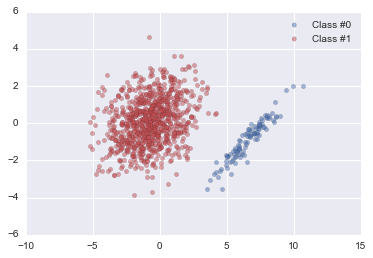

In [59]:
#Imbalanced Data generation
x, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Instantiate a PCA object for the sake of easy visualisation
pca = PCA(n_components = 2)
x_vis = pca.fit_transform(x)

# Plot the two classes
palette = sns.color_palette()
plt.scatter(x_vis[y==0, 0], x_vis[y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_vis[y==1, 0], x_vis[y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

**Undersampling Methods**: It reduces the number of observations from majority class to balance the data set. The various methods of undersampling implemented in this notebook includes: 
1. UnderSampler: Randomly under-samples the majority class with replacement
2. TomekLinks: Identifies all Tomek links between the majority and minority classes 
3. ClusterCentroids: Under-sampling with Cluster Centroids using K-means
4. NearMiss method: Selects the majority class samples which are close to some minority class samples
5. Condensed Nearest Neighbour: Selects subset of instances that are able to correctly classifying the original datasets using one-nearest neighbor rule.
6. One Side Selection: Method resulting from the application of Tomek links followed by Condensed Nearest Neighbor.
7. Neighborhood Cleaning Rule: Utilizes the one-sided selection principle, but considers more carefully the quality of the data to be removed. 

In [60]:
# Generating new dataset using under-sampling methods mentioned above
verbose = True

# 'UnderSampler'
US = RandomUnderSampler(return_indices=verbose)
usx, usy, usi = US.fit_sample(x, y)

# 'Tomek links'
TL = TomekLinks(return_indices=verbose)
tlx, tly, tli = TL.fit_sample(x, y)

# 'K-means Clustering centroids'
CC = ClusterCentroids()
ccx, ccy = CC.fit_sample(x, y)

# 'NearMiss-1'
NM1 = NearMiss(version=1, return_indices=verbose)
nm1x, nm1y, nm1i = NM1.fit_sample(x, y)

# 'NearMiss-2'
NM2 = NearMiss(version=2, return_indices=verbose)
nm2x, nm2y, nm2i = NM2.fit_sample(x, y)

# 'NearMiss-3'
NM3 = NearMiss(version=3, return_indices=verbose)
nm3x, nm3y, nm3i = NM3.fit_sample(x, y)

# 'Condensed Nearest Neighbour'
CNN = CondensedNearestNeighbour(size_ngh=51, n_seeds_S=51, return_indices=verbose)
cnnx, cnny, cnni = CNN.fit_sample(x, y)

# 'One-Sided Selection'
OSS = OneSidedSelection(size_ngh=51, n_seeds_S=51, return_indices=verbose)
ossx, ossy, ossi = OSS.fit_sample(x, y)

# 'Neighboorhood Cleaning Rule'
NCR = NeighbourhoodCleaningRule(size_ngh=51, return_indices=verbose)
ncrx, ncry, ncri = NCR.fit_sample(x, y) 

# Applying PCA to visualise the results
usx_vis = pca.transform(usx)
tlx_vis = pca.transform(tlx)
ccx_vis = pca.transform(ccx)
nm1x_vis = pca.transform(nm1x)
nm2x_vis = pca.transform(nm2x)
nm3x_vis = pca.transform(nm3x)
cnnx_vis = pca.transform(cnnx)
ossx_vis = pca.transform(ossx)
ncrx_vis = pca.transform(ncrx)

C:\Users\saj16\Anaconda3\lib\site-packages\imblearn\under_sampling\nearmiss.py:209: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn('The number of the samples to be selected is larger'


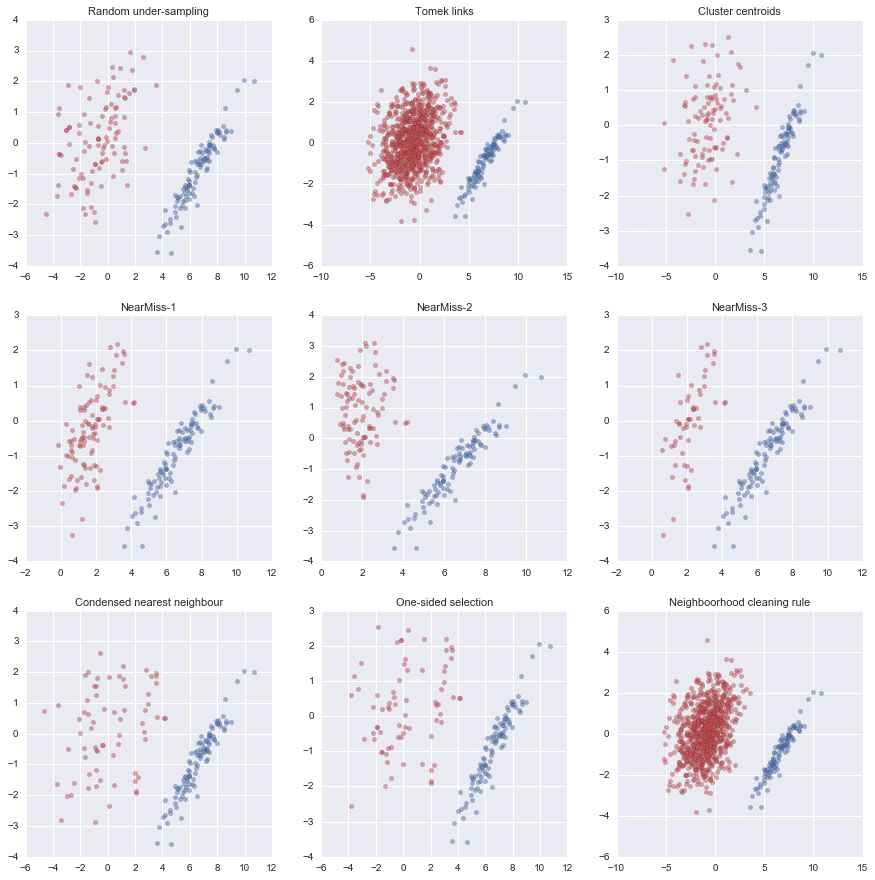

In [61]:
# Plotting the new dataset after under-sampling
palette = sns.color_palette()
fs = 11 # fontsize
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# Random under-sampling
axes[0, 0].scatter(usx_vis[usy==0, 0], usx_vis[usy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(usx_vis[usy==1, 0], usx_vis[usy==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random under-sampling', fontsize=fs)

# Tomek links
axes[0, 1].scatter(tlx_vis[tly==0, 0], tlx_vis[tly==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(tlx_vis[tly==1, 0], tlx_vis[tly==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('Tomek links', fontsize=fs)

# Cluster centroids
axes[0, 2].scatter(ccx_vis[ccy==0, 0], ccx_vis[ccy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 2].scatter(ccx_vis[ccy==1, 0], ccx_vis[ccy==1, 1], label="Class #1", alpha=0.5, 
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)
axes[0, 2].set_title('Cluster centroids', fontsize=fs)

# NearMiss-1
axes[1, 0].scatter(nm1x_vis[nm1y==0, 0], nm1x_vis[nm1y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 0].scatter(nm1x_vis[nm1y==1, 0], nm1x_vis[nm1y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 0].set_title('NearMiss-1', fontsize=fs)

# NearMiss-2
axes[1, 1].scatter(nm2x_vis[nm2y==0, 0], nm2x_vis[nm2y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 1].scatter(nm2x_vis[nm2y==1, 0], nm2x_vis[nm2y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 1].set_title('NearMiss-2', fontsize=fs)

# NearMiss-3
axes[1, 2].scatter(nm3x_vis[nm3y==0, 0], nm3x_vis[nm3y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 2].scatter(nm3x_vis[nm3y==1, 0], nm3x_vis[nm3y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 2].set_title('NearMiss-3', fontsize=fs)

# Condensed nearest neighbour
axes[2, 0].scatter(cnnx_vis[cnny==0, 0], cnnx_vis[cnny==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[2, 0].scatter(cnnx_vis[cnny==1, 0], cnnx_vis[cnny==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[2, 0].set_title('Condensed nearest neighbour', fontsize=fs)

# One-sided selection
axes[2, 1].scatter(ossx_vis[ossy==0, 0], ossx_vis[ossy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[2, 1].scatter(ossx_vis[ossy==1, 0], ossx_vis[ossy==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[2, 1].set_title('One-sided selection', fontsize=fs)

# Neighboorhood cleaning rule
axes[2, 2].scatter(ncrx_vis[ncry==0, 0], ncrx_vis[ncry==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[2, 2].scatter(ncrx_vis[ncry==1, 0], ncrx_vis[ncry==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[2, 2].set_title('Neighboorhood cleaning rule', fontsize=fs)

plt.show()

**Oversampling Methods**: Replicates the observations from minority class to balance the data. The various methods of oversampling implemented in this notebook includes:

1. RandomOverSampler: Randomly over-samples the minority class with replacement.
2. SMOTE- Synthetic Minority Over-sampling Technique: It works by creating synthetic samples from the minor class instead of creating copies.
3. bSMOTE- Borderline SMOTE:  Minority samples near the borderline are over-sampled. 
4. SVM_SMOTE- Support Vectors SMOTE: The SVM smote model fits a support vector machine classifier to the data and uses the support vector to provide a notion of boundary. Unlike regular smote, where such notion relies on proportion of nearest neighbours belonging to each class.
5. SMOTE + Tomek links (Combines Over-sampling followed by under-sampling): Performs over-sampling using SMOTE and cleaning using Tomek links.
6. SMOTE + ENN (Combines Over-sampling followed by under-sampling): Performs over-sampling using SMOTE and cleaning using Edited Nearest Neighbours (ENN). 
7. EasyEnsemble: Create an ensemble of balanced sets by iteratively under-sampling the imbalanced dataset using an estimator.
8. BalanceCascade: BalanceCascade is similar to EasyEnsemble except that it removes correctly classified major class examples of trained learners from further consideration.

In [73]:
# Generate new dataset after over-sampling methods

# 'Random over-sampling'
OS = RandomOverSampler()
osx, osy = OS.fit_sample(x, y)

# 'SMOTE'
smote = SMOTE(kind='regular')
smox, smoy = smote.fit_sample(x, y)

# 'SMOTE bordeline 1'
bsmote1 = SMOTE(kind='borderline1')
bs1x, bs1y = bsmote1.fit_sample(x, y)

# 'SMOTE bordeline 2'
bsmote2 = SMOTE(kind='borderline2')
bs2x, bs2y = bsmote2.fit_sample(x, y)

# 'SMOTE SVM'
svmsmote = SMOTE(kind='svm')
svsx, svsy = svmsmote.fit_sample(x, y)

# 'SMOTE Tomek links'
STK = SMOTETomek()
stkx, stky = STK.fit_sample(x, y)

# 'SMOTE ENN'
SENN = SMOTEENN()
ennx, enny = SENN.fit_sample(x, y)

# 'EasyEnsemble'
EE = EasyEnsemble()
eex, eey = EE.fit_sample(x, y)

# 'BalanceCascade'
BS = BalanceCascade()
bsx, bsy = BS.fit_sample(x, y)

# Apply PCA to visualise the results
osx_vis = pca.transform(osx)
smox_vis = pca.transform(smox)
bs1x_vis = pca.transform(bs1x)
bs2x_vis = pca.transform(bs2x)
svsx_vis = pca.transform(svsx)
stkx_vis = pca.transform(stkx)
ennx_vis = pca.transform(ennx)

# Project each subset of the ensemble
eex_vis = []
for e in eex:
    eex_vis.append(pca.transform(e))
bsx_vis = []
for e in bsx:
    bsx_vis.append(pca.transform(e))

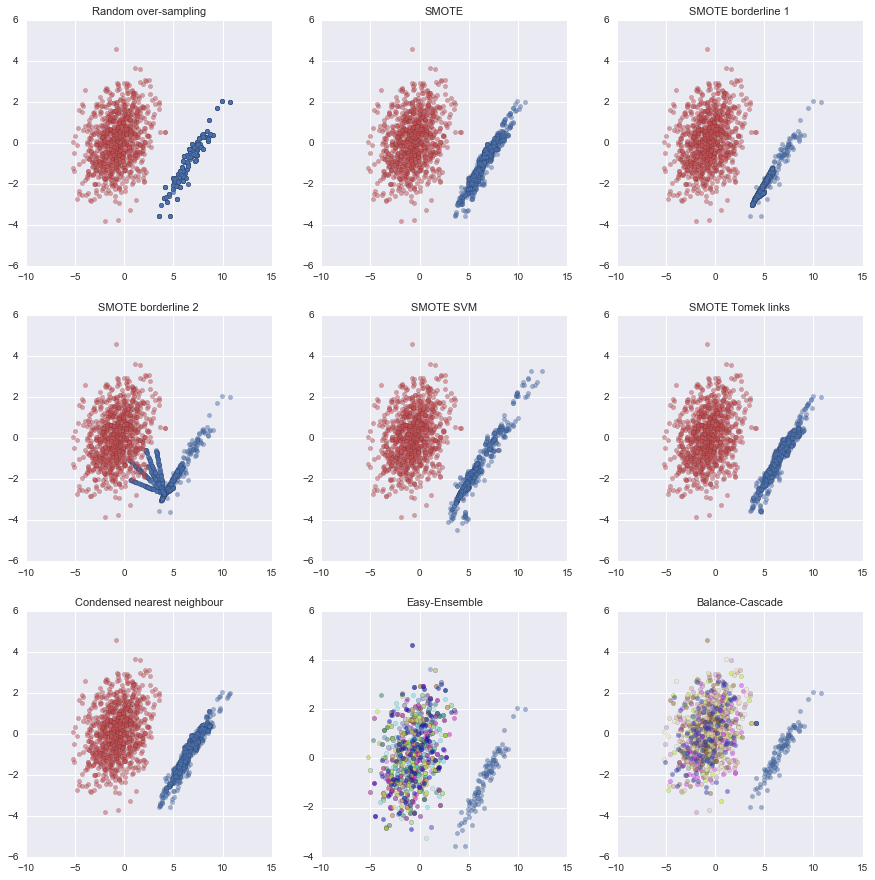

In [74]:
# Initialise the figure
palette = sns.color_palette()
fs = 11 # fontsize
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

# Random over-sampling
axes[0, 0].scatter(osx_vis[osy==0, 0], osx_vis[osy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 0].scatter(osx_vis[osy==1, 0], osx_vis[osy==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[0, 0].set_title('Random over-sampling', fontsize=fs)

# SMOTE
axes[0, 1].scatter(smox_vis[smoy==0, 0], smox_vis[smoy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 1].scatter(smox_vis[smoy==1, 0], smox_vis[smoy==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[0, 1].set_title('SMOTE', fontsize=fs)

# SMOTE borderline 1
axes[0, 2].scatter(bs1x_vis[bs1y==0, 0], bs1x_vis[bs1y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[0, 2].scatter(bs1x_vis[bs1y==1, 0], bs1x_vis[bs1y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[0, 2].set_title('SMOTE borderline 1', fontsize=fs)

# SMOTE borderline 2
axes[1, 0].scatter(bs2x_vis[bs2y==0, 0], bs2x_vis[bs2y==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 0].scatter(bs2x_vis[bs2y==1, 0], bs2x_vis[bs2y==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 0].set_title('SMOTE borderline 2', fontsize=fs)

# SMOTE SVM
axes[1, 1].scatter(svsx_vis[svsy==0, 0], svsx_vis[svsy==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 1].scatter(svsx_vis[svsy==1, 0], svsx_vis[svsy==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 1].set_title('SMOTE SVM', fontsize=fs)

# SMOTE Tomek links
axes[1, 2].scatter(stkx_vis[stky==0, 0], stkx_vis[stky==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[1, 2].scatter(stkx_vis[stky==1, 0], stkx_vis[stky==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[1, 2].set_title('SMOTE Tomek links', fontsize=fs)

# SMOTE ENN
axes[2, 0].scatter(ennx_vis[enny==0, 0], ennx_vis[enny==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
axes[2, 0].scatter(ennx_vis[enny==1, 0], ennx_vis[enny==1, 1], label="Class #1", alpha=0.5, facecolor=palette[2], linewidth=0.15)
axes[2, 0].set_title('Condensed nearest neighbour', fontsize=fs)

# Easy-Ensemble
axes[2, 1].scatter(eex_vis[0][eey[0]==0, 0], eex_vis[0][eey[0]==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
for iy, e in enumerate(eex_vis):
    axes[2, 1].scatter(e[eey[iy]==1, 0], e[eey[iy]==1, 1], label="Class #1", alpha=0.5, facecolor=np.random.rand(3,), linewidth=0.15)
axes[2, 1].set_title('Easy-Ensemble', fontsize=fs)

# Balance-Cascade
axes[2, 2].scatter(bsx_vis[0][bsy[0]==0, 0], bsx_vis[0][bsy[0]==0, 1], label="Class #0", alpha=0.5, facecolor=palette[0], linewidth=0.15)
for iy, e in enumerate(bsx_vis):
    axes[2, 2].scatter(e[bsy[iy]==1, 0], e[bsy[iy]==1, 1], label="Class #1", alpha=0.5, facecolor=np.random.rand(3,), linewidth=0.15)
axes[2, 2].set_title('Balance-Cascade', fontsize=fs)

plt.show()

Imbalance Learn API documentation: http://contrib.scikit-learn.org/imbalanced-learn/api.html

For R implementation of above methods refer to Package ‘unbalanced’: https://cran.r-project.org/web/packages/unbalanced/unbalanced.pdf